## What is the most optimal skill to learn for Data Analyst?

In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [7]:
df_us_da = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_us_da = df_us_da.dropna(subset=['salary_year_avg'])

df_us_da_exploded = df_us_da.explode('job_skills')

df_us_da_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [18]:
df_da_skills = df_us_da_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_us_da)

df_da_skills['skill_percent'] = 100 * df_da_skills['skill_count'] / da_job_count

skill_percent = 5

df_da_skills_top_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_top_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


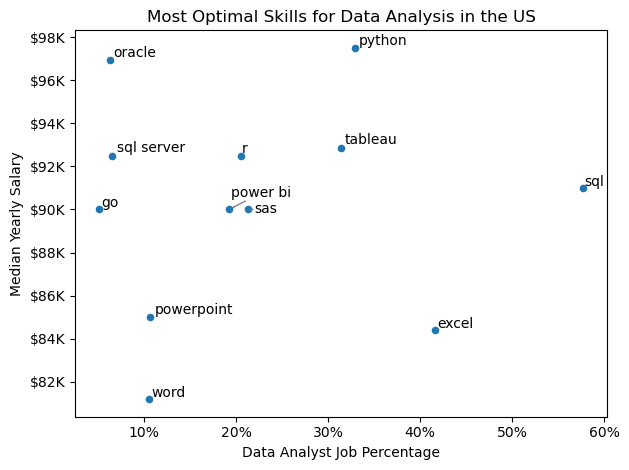

In [25]:
from adjustText import adjust_text

df_da_skills_top_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_da_skills_top_demand.index):
    texts.append(plt.text(df_da_skills_top_demand['skill_percent'].iloc[i], df_da_skills_top_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.title('Most Optimal Skills for Data Analysis in the US')
plt.xlabel('Data Analyst Job Percentage')
plt.ylabel('Median Yearly Salary')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()
plt.show()

In [27]:
df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()

tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

In [29]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])
df_tech = df_tech.explode('skills')
df_tech

,technology,skills
0,analyst_tools,looker
0,analyst_tools,msaccess
0,analyst_tools,tableau
0,analyst_tools,sheets
0,analyst_tools,ms access
...,...,...
9,sync,ringcentral
9,sync,rocketchat
9,sync,google chat
9,sync,zoom


In [34]:
df_plot = df_da_skills_top_demand.merge(df_tech, left_on='job_skills', right_on='skills')

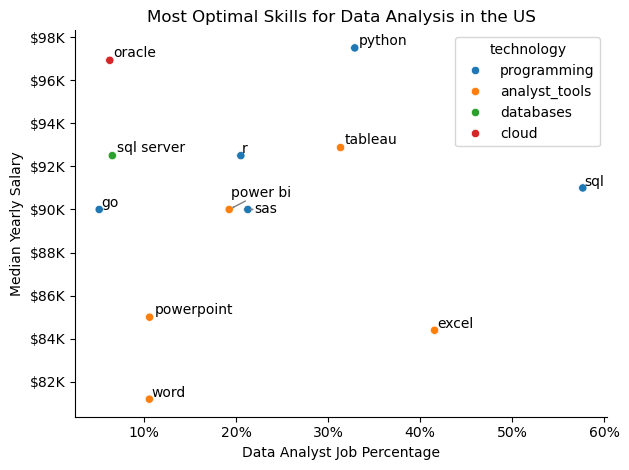

In [37]:
from adjustText import adjust_text

#df_da_skills_top_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot, 
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()

texts = []
for i, txt in enumerate(df_da_skills_top_demand.index):
    texts.append(plt.text(df_da_skills_top_demand['skill_percent'].iloc[i], df_da_skills_top_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.title('Most Optimal Skills for Data Analysis in the US')
plt.xlabel('Data Analyst Job Percentage')
plt.ylabel('Median Yearly Salary')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()
plt.show()